# 데이터분석의 모든 것_통계학기반 데이터분석 1강

### [실습1] t-검정 | 일표본 검증

In [18]:
import numpy as np
from scipy import stats

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


#### 일표본 t-test:
모집단의 알려진 평균과 표본의 평균을 비교하는 검정입니다.

In [4]:
# 데이터 준비
tree1_random = np.random.choice(400, size = 10, replace=True)
               # 0~399 수 중에서 랜덤으로 10개 추출. replace= False <--복원추출
tree1_random
tree1_random.mean()

154.3

In [11]:
# 귀무가설: 평균이 400이다   (모집단의 평균400과 샘플의 평균의 차이가 0이다.)
# 대립가설: 평균이 400이 아니다.

# 일표본 t-test
print(stats.ttest_1samp(tree1_random, 400, alternative='two-sided'))
## alternative 옵션은 귀무가설에 대한 대립가설의 방향을 명시함
## - two-sided: 양측검정, default 옵션
## - less: 단측검정 - 왼쪽
## - greater: 단측검정 - 오른쪽

TtestResult(statistic=-6.16359289403978, pvalue=0.0001659773431623286, df=9)


In [ ]:
# 해석
# pvalue=0.0054  이므로  0.05보다 작으므로 귀무가설 기각. 대립가설 채택

In [6]:
help(stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats._stats_py:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
    Calculate the T-test for the mean of ONE group of scores.

    This is a test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.

    Parameters
    ----------
    a : array_like
        Sample observations.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then its length along
        `axis` must equal 1, and it must otherwise be broadcastable with `a`.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan

### [실습2] t-검정 | 독립 이표본 (independent) 검증

두 집단이 서로 다른 모집단에서 추출된, 독립된 두 집단의 평균의 차이를 검정하는 것

In [12]:
### 데이터 준비
"""서울지역 12세 남학생들의 몸무게와 부산지역 12세 남학생 들의 몸무게를 측정했다. 다른 집단에서 각각 표본을 추출하였으므로 독립이표본이다.
두 집단의 몸무게 차이가 있는지,그 차이가 유의미한 차이가 t-검정을 해보자.
"""
Seoul = [43.12, 40.94, 42.36, 50.64, 50, 43.49, 43.72, 40.19, 46.6, 43.75,
         42.31, 44.7, 43.39, 33.08, 40.67, 49.5, 34.14, 40.61, 35.21, 37.91]
Busan = [41.74, 42.35, 40.62, 28.64, 49.64, 40.94, 43.25, 40.3, 56.03,43.77,
         51.3, 44.26, 42.6, 32.19, 39.72, 49.2, 33.03, 40.45, 36.03, 38.1]

In [14]:
# 귀무가설: 두 집단의 평균의 차이가 0이다.
# 대립가설: 두 집단의 평균의 차이가 0이 아니다.

### 독립 이표본 (independent) t-test
tTestResult = stats.ttest_ind(Seoul, Busan)

print(tTestResult)

TtestResult(statistic=0.3332423096643642, pvalue=0.7407831552749102, df=38.0)


In [ ]:
# 해석
# 검정 결과 p-value는 0.7409이다.
# p-value가 0.05보다 작지 않으므로 귀무가설은 채택하고, 대립가설이 기각된다.
# 즉, 두 집단의 몸무게 차이는 유의미하지 않다.

In [17]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)
    Calculate the T-test for the means of *two independent* samples of scores.

    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.

    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    equal_

### [실습3] t-검정 | 대응 이표본 검증     
두 집단이 서로 같은 모집단에서 추출된 대응된 두 집단의 평균의 차이를 검정하는 것

In [15]:
# 데이터 준비

np.random.seed(1)   # to get consistent result

# before treatment : mean 60, standard deviation 5
beforeWeights = [60 + np.random.normal(0, 5) for _ in range(20)]
# 다이어트약 임상 시험 대상자들의 몸무게

# after treatment : mean 0.99-fold decrease, standard deviation 0.02
afterWeights = [w * np.random.normal(0.99, 0.02) for w in beforeWeights]
# 다이어트약 복용 후, 임상 시험 대상자들의 몸무게

print( beforeWeights, '\n' ,afterWeights )

[68.1217268183162, 56.94121793174962, 57.359141238682724, 54.63515688921915, 64.3270381466234, 48.492306515598585, 68.7240588210824, 56.19396549552449, 61.59519548028549, 58.75314812261295, 67.31053968522487, 49.69929645251173, 58.38791397993246, 58.07972822665792, 65.66884721167719, 54.500543663429845, 59.13785896224782, 55.61070791039314, 60.21106873357797, 62.914076068579114] 
 [65.94098797171107, 57.67544499710449, 57.819839215935254, 54.63788246116392, 64.84275566541605, 47.34427263203588, 67.86790793112998, 54.58033393455883, 60.64923115285458, 58.78881770728494, 65.70631311881824, 48.80793606499072, 57.001583230054315, 56.517144665313666, 64.13055954741337, 53.94173367626836, 57.224973536332286, 55.315321289307555, 61.60772730564428, 63.218635763189475]


In [16]:
# 귀무가설: beforeWeights와 afterWeights의 평균 차이가 0이다.
# 대립가설: beforeWeights와 afterWeights의 평균 차이가 0이 아니다.

#  대응 이표본  t-test  (default : 양측검정)
tTestResult = stats.ttest_rel(beforeWeights, afterWeights)
print(tTestResult)

TtestResult(statistic=0.36758757315272717, pvalue=0.7152202690623072, df=38.0)


In [ ]:
# 해석
# p-value < 0.05에서 귀무 가설을 기각한다.
# 즉, 다이어트 약 복용 전/후에 체중 차이는 유의미하다고 할 수 있다

In [ ]:
## 참고
## 이 예제는 단측검정이 더 적합하다.

# 귀무가설: beforeWeights와 afterWeights의 차이가 0보다 작다
# 대립가설: beforeWeights와 afterWeights의 차이가 0보다 크다

#  대응 이표본  t-test  (단측검정)
tTestResult = stats.ttest_rel(beforeWeights, afterWeights, alternative="greater")
print(tTestResult)

### [실습4] F-검정 | 일원분산분석(One-way ANOVA)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 분산분석에는 여러 종류가 있지만,
# 여기서는 일원분산분석(One-way ANOVA)과 이원분산분석(Two-way ANOVA)를 알아보겠다.
# 1) 일원분산분석(One-way ANOVA)
#  종속변인은 1개이며, 독립변인의 집단도 1개인 경우다.
#  한 가지 변수의 변화가 결과 변수에 미치는 영향을 보기 위해 사용된다.
# 파이썬에서 One-way ANOVA 분석은 scipy.stats이나 statsmodel 라이브러리를 이용해서 할 수 있다.
# statsmodel 라이브러리가 좀 더 많고 규격화된 정보를 제공한다.

# 예제) 22명의 심장 우회 수술을 받은 환자를 다음의 3가지 그룹으로 나누었다.
#  Group I  : 50% 아산화 질소(nitrous oxide)와 50%의 산소(oxygen) 혼합물을 24시간 동안 흡입한 환자
#  Group II : 50% 아산화 질소와 50% 산소 혼합물을 수술 받는 동안만 흡입한 환자
#  Group III : 아산화 질소 없이 오직 35-50%의 산소만 24시간 동안 처리한 환자
#  그런 다음 적혈구의 엽산 수치를 24시간 이후에 측정하였다.

[array([243., 251., 275., 291., 347., 354., 380., 392.]), array([206., 210., 226., 249., 255., 273., 285., 295., 309.]), array([241., 258., 270., 293., 328.])]


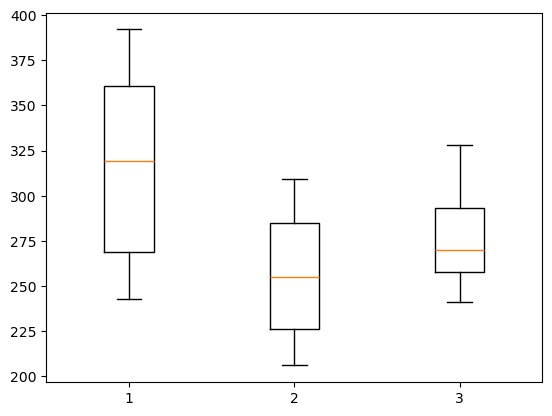

In [20]:
#  데이터 준비
import urllib  # url로 데이터 얻어오기
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[: ,1 ]==1 ,0]
group2 = data[data[: ,1 ]==2 ,0]
group3 = data[data[: ,1 ]==3 ,0]

# matplotlib plotting
plot_data = [group1, group2, group3]
print(plot_data)
ax = plt.boxplot(plot_data)
plt.show()

In [ ]:
# Boxplot에서 볼 수 있듯이, 평균값의 차이가 실제로 의미가 있는 차이인지,
# 분산이 커서 그런 것인지 애매한 상황이다.
# 이런 상황에서 분산분석을 통해 통계적 유의성을 알아 볼 수 있다.
# Scipy.stats으로 일원분산분석 : 아래와 같은 코드로 분산분석을 할 수 있다.


In [32]:
help(stats.f_oneway)

Help on function f_oneway in module scipy.stats._stats_py:

f_oneway(*samples, axis=0, nan_policy='propagate', keepdims=False)
    Perform one-way ANOVA.

    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.

    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan_policy : {'propagate', 'omit', 'rai

In [22]:
# 일원 분산 분석

# 귀무가설 : 세 그룹의 적혈구의 엽산 수치의 차이가 없다.
# 대립가설 : 세 그룹의 적혈구의 엽산 수치의 차이가 있다.

import scipy.stats as stats
f_statistic, pval = stats.f_oneway(group1, group2, group3)
print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(f_statistic, pval))  # F=3.7, p=0.04359

# 해석
if pval < 0.05:
    print("귀무가설 기각. 대립가설 채택")
    print('p-value 값이 유의수준 보다 작음으로 인해 세 그룹의 적혈구의 엽산 수치가 통계적으로 유의미하게 차이가 남.')

Altman 910 데이터의 일원분산분석 결과 : F=3.7, p=0.04359
귀무가설 기각. 대립가설 채택
p-value 값이 유의수준 보다 작음으로 인해 세 그룹의 적혈구의 엽산 수치가 통계적으로 유의미하게 차이가 남.


In [26]:
# 일원 분산 분석

# 이번에는 pandas와 statsmodels 라이브러리를 사용해서 분산분석을 수행.
# Statsmodel을 사용한 일원분산분석
import statsmodels.formula.api as smf
import statsmodels.api as sm

df = pd.DataFrame(data, columns=['value', 'treatment'])

# the "C" indicates categorical data, C는 범주형 변수
model = smf.ols('value ~ C(treatment)', df).fit()
print(sm.stats.anova_lm(model))
# statsmodels 을 사용하면 간편하게 결과를 얻을 수 있다.

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


In [ ]:
## 문제 :
## iris.csv 파일을 읽고, 붓꽃의 품종(Name)별로 SepalWidth 가
## 통계학적으로 유의하게 차이가 나는지 일분분산분석하세요.

In [ ]:
 # 답



### [실습5] f-검정 | 이원분산분석(One-way ANOVA)

In [ ]:
# 2) 이원분산분석(two-way ANOVA)  ---------------------------
# 독립변인의 수가 두 개 이상일 때 집단 간 차이가 유의한지를 검증하는 데 사용한다.
# 상호작용효과(Interaction effect), 한 변수의 변화가 결과에 미치는 영향이
# 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용된다.
# 예제 데이터 설명
# 태아의 머리 둘레 측정 데이터다. 4명의 관측자가 3명의 태아를 대상으로 측정함.
# 이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사함.

    head_size  fetus  observer
31       12.7    3.0       3.0
32       12.5    3.0       3.0
33       13.0    3.0       4.0
34       12.9    3.0       4.0
35       13.8    3.0       4.0


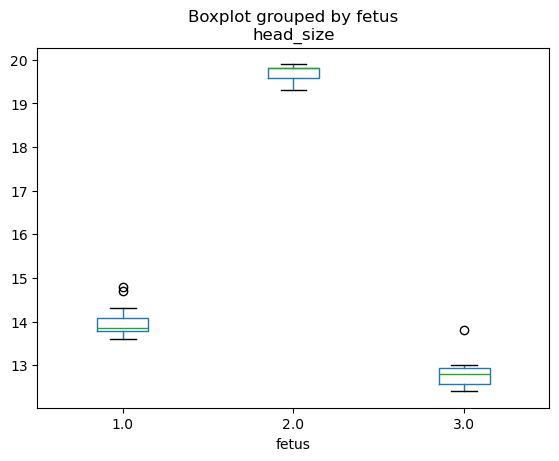

In [27]:
# 데이터 준비

url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + 'altman_12_6.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df = pd.DataFrame(data, columns=['head_size', 'fetus', 'observer'])
print(df.tail())

#     head_size  fetus  observer
# 31       12.7    3.0       3.0
# 32       12.5    3.0       3.0
# 33       13.0    3.0       4.0
# 34       12.9    3.0       4.0
# 35       13.8    3.0       4.0

# 태아별 머리 둘레 plot 만들기
df.boxplot(column = 'head_size', by='fetus' , grid = False)
plt.show()

In [31]:
# 태아(fetus) 3명의 머리둘레는 차이가 있어 보이나
# 이것이 관측자와 상호작용이 있는 것인지 분석을 통해 알아 보겠다.
# 분산분석으로 상관관계 확인: statmodels 라이브러리를 사용해 계산

#### 일원분산분석 C(fetus)
# 귀무가설 : 태아별  머리둘레의 크기는 차이가 없다.
# 대립가설 : 태아별  머리둘레의 크기는 차이가 있다.

#### 일원분산분석 C(observer)
# 귀무가설 : 관찰자별 태아측정 머리둘레의 크기는 차이가 없다.
# 대립가설 :  관찰자별 태아측정  머리둘레의 크기는 차이가 있다.

#### 이원분산분석 C(fetus):C(observer)
# 귀무가설 : 태아별 관측자별 그룹의 태아 머리둘레의 크기는 차이가 없다.
# 대립가설 : 태아별 관측자별 그룹의 태아 머리둘레의 크기는 차이가 있다.

formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = smf.ols(formula, df).fit()  # 선형회귀를 이용
print(sm.stats.anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


In [ ]:
# 해설

#### 일원분산분석      C(fetus) p value=.051039e-27   귀무가설 기각
# 귀무가설 : 태아별  머리둘레의 크기는 차이가 없다.
# 대립가설 : 태아별  머리둘레의 크기는 차이가 있다.

#### 일원분산분석   C(observer) p value=.6.497055e-03  귀무가설 기각
# 귀무가설 : 관찰자별 태아측정 머리둘레의 크기는 차이가 없다.
# 대립가설 :  관찰자별 태아측정  머리둘레의 크기는 차이가 있다.

####이원분산분석   C(fetus):C(observer) p value= 3.295509e-01  귀무가설 채택
# 귀무가설 : 태아별 관측자별 그룹의 태아 머리둘레의 크기는 차이가 없다.
# 대립가설 : 태아별 관측자별 그룹의 태아 머리둘레의 크기는 차이가 있다

        # p-value 가 0.05 보다 크다. 따라서 귀무가설을 기각할 수 없고,
        # 측정자와 태아의 머리 둘레값에는 연관성이 없다고 할 수 있다.
        # 측정하는 사람이 달라도 머리 둘레값은 일정하다는 얘기.

# 해설 : 초음파로 측정하는 태아의 머리 둘레값은 믿을 수 있다고 판단할 수 있다.